## **Iris Flower Classification using Scikit-learn and Tensorflow**

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting
from pandas.plotting import andrews_curves
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**Reading Dataset**

In [ ]:
df = pd.read_csv("IRIS.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.tail(15)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.shape

(150, 5)

In [ ]:
df.size

750

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### **EDA for Iris Flower Classification**


<Axes: xlabel='species', ylabel='sepal_length'>

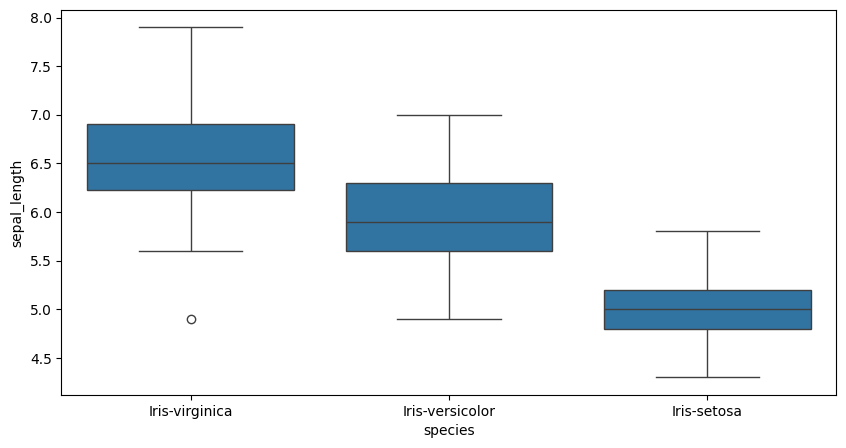

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'species',y = 'sepal_length', data = df.sort_values('sepal_length',ascending = False))

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

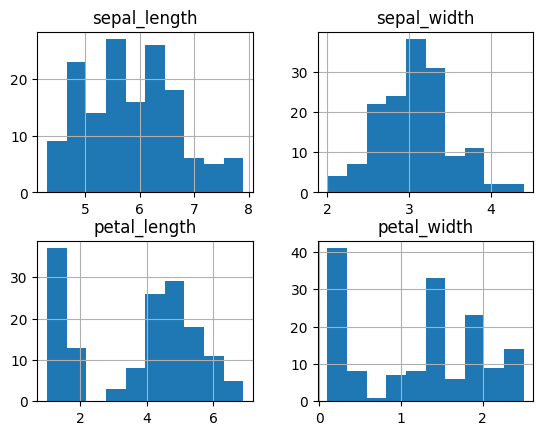

In [ ]:
df.hist()

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

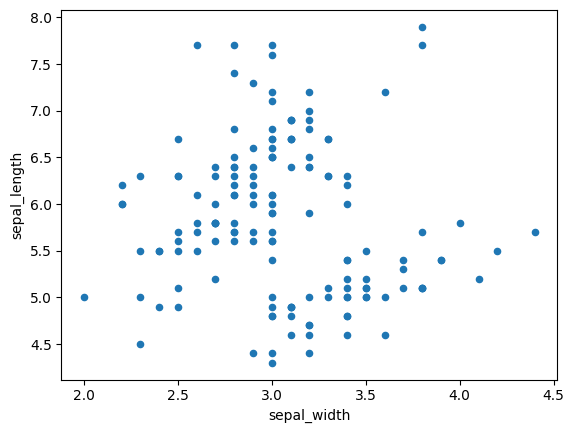

In [ ]:
df.plot(kind='scatter', x='sepal_width', y='sepal_length')

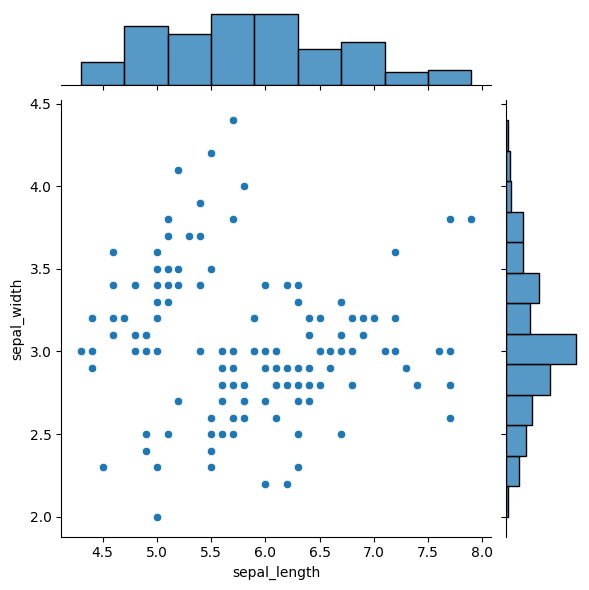

In [ ]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data=df)

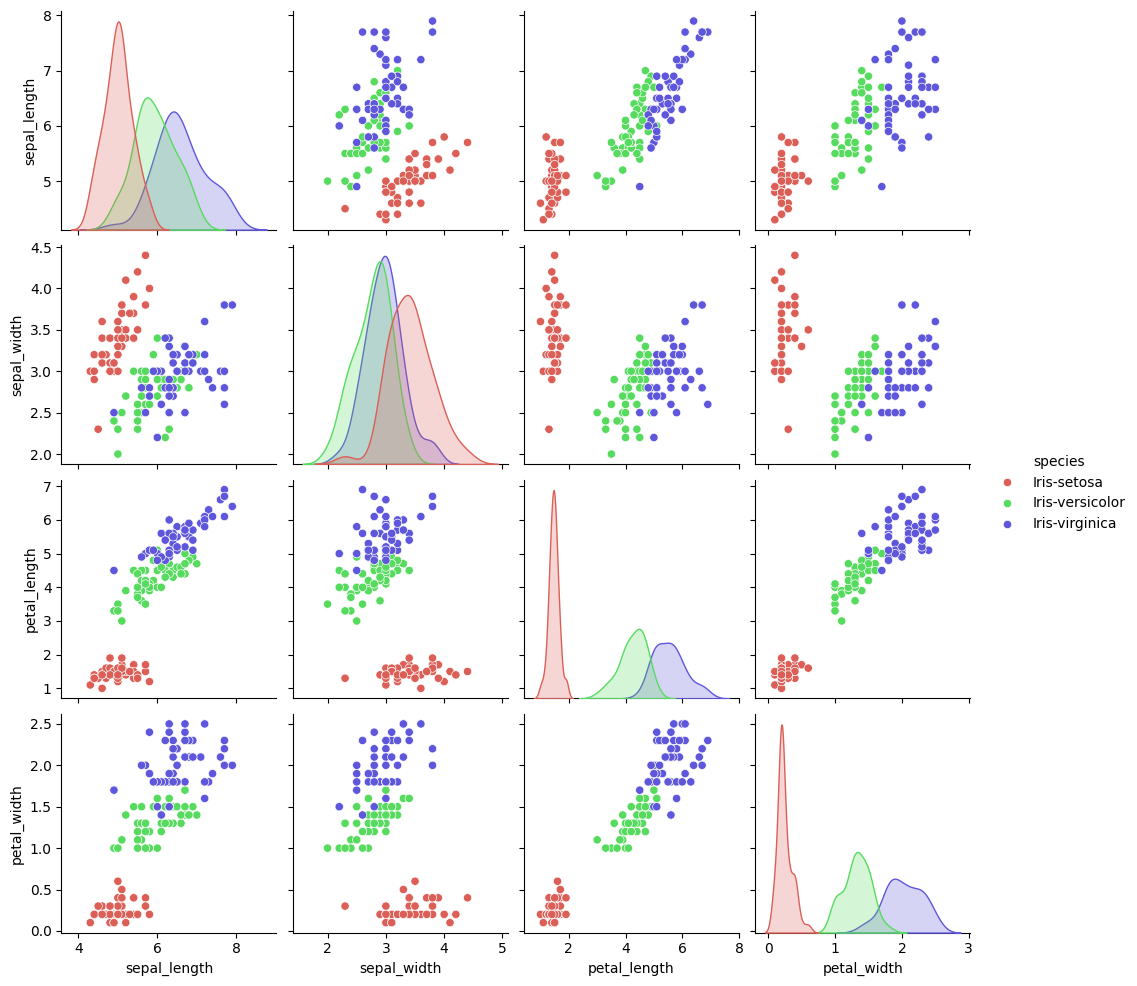

In [ ]:
sns.pairplot(df, hue="species", palette = 'hls')

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

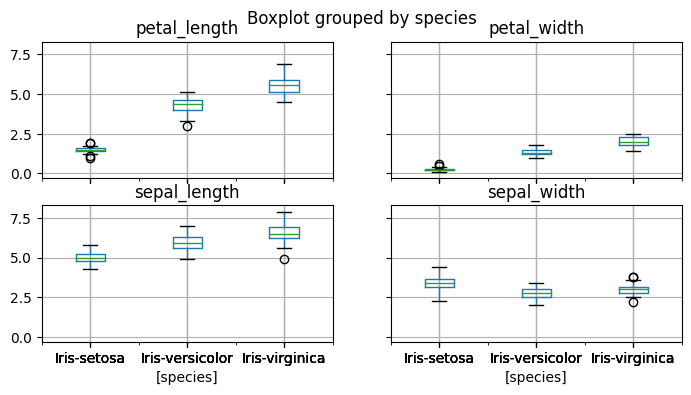

In [ ]:
df.boxplot(by = 'species', figsize=(8,4))

<Axes: >

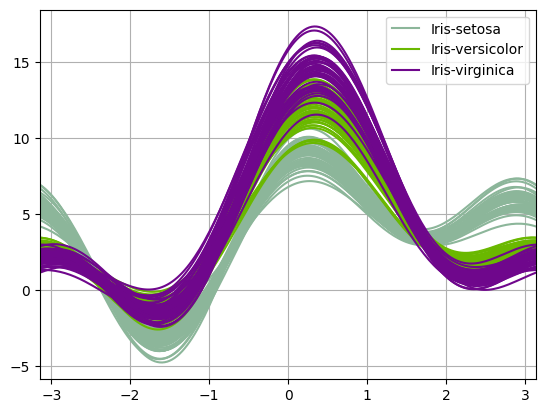

In [ ]:
andrews_curves(df,"species")

<Axes: xlabel='species', ylabel='petal_width'>

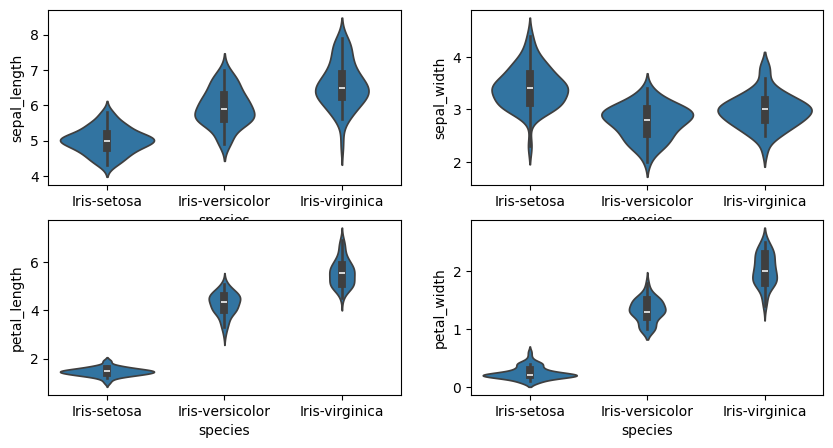

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)

In [ ]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
X = df.drop(columns = ['species'])
y = df['species']
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle=True, random_state=69)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
sc = StandardScaler()
print(X_train[:1])
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:1])

    sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 2s - loss: 1.1918 - accuracy: 0.3905 - 2s/epoch - 426ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0811 - accuracy: 0.4476 - 22ms/epoch - 5ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0017 - accuracy: 0.5048 - 29ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9663 - accuracy: 0.4667 - 19ms/epoch - 5ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9173 - accuracy: 0.5619 - 19ms/epoch - 5ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8783 - accuracy: 0.5238 - 20ms/epoch - 5ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8511 - accuracy: 0.6286 - 24ms/epoch - 6ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8171 - accuracy: 0.6286 - 21ms/epoch - 5ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8136 - accuracy: 0.6381 - 21ms/epoch - 5ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7185 - accuracy: 0.6762 - 23ms/epoch - 6ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6720 - accuracy: 0.6952 - 21ms/epoch - 5ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6963 - accuracy: 0.6762 - 19ms/epoch - 5ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6151 - accuracy: 

In [ ]:
prediction = model.predict(X_test)
print(prediction[:5])

2/2 [==============================] - 0s 7ms/step
[[9.9983788e-01 1.6208505e-04 2.9088236e-08]
 [5.3689382e-03 9.5223683e-01 4.2394225e-02]
 [9.9926090e-01 7.3879823e-04 3.0521889e-07]
 [4.7548332e-05 2.5003895e-02 9.7494864e-01]
 [9.9898338e-01 1.0161018e-03 5.5388983e-07]]


In [ ]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [ ]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: species, dtype: int64


In [ ]:
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [ ]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


### **Heatmap**

Text(50.72222222222221, 0.5, 'actual')

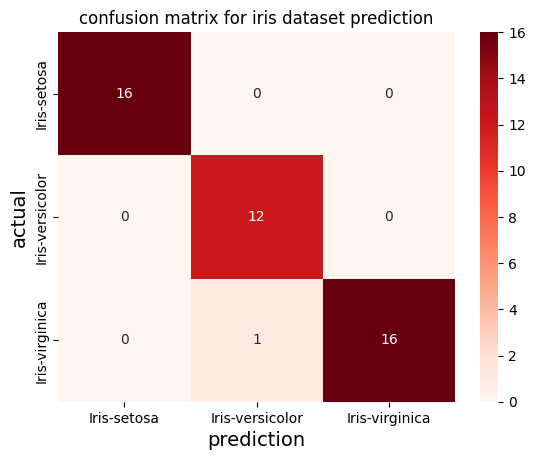

In [ ]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for iris dataset prediction')
ax.set_xlabel('prediction',fontsize=14)
ax.set_ylabel('actual',fontsize=14)

**Training and Testing Spilts in 70-30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [ ]:
#Logistic Regression
lreg_model = LogisticRegression()
lreg_model.fit(X_train, y_train)
prediction = lreg_model.predict(X_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Logistic Regression: %.2f%%" % (accuracy * 100.0))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of K-Nearest Neighbors: %.2f%%" % (accuracy * 100.0))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Decision Tree: %.2f%%" % (accuracy * 100.0))

Accuracy of Logistic Regression: 95.56%
Accuracy of K-Nearest Neighbors: 95.56%
Accuracy of Decision Tree: 91.11%


**Training and Testing Spilts in 80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
#Logistic Regression
lreg_model = LogisticRegression()
lreg_model.fit(X_train, y_train)
prediction = lreg_model.predict(X_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Logistic Regression : %.2f%%" % (accuracy * 100.0))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of K-Nearest Neighbors : %.2f%%" % (accuracy * 100.0))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Decision Tree: %.2f%%" % (accuracy * 100.0))

Accuracy of Logistic Regression : 93.33%
Accuracy of K-Nearest Neighbors : 93.33%
Accuracy of Decision Tree: 93.33%
